---
<a id = "section2"></a>
## <span style = "color:blue" > FINAL PROJECT - Road accidents in Israel: </span>

##                       Group Number 3

### presenters:
##### Dganit Shchori
##### Saleet Haisraeli
##### Dvir Dahan
##### Shiri Nadav

<div>
<img src="WhatsApp Image 2022-09-04 at 13.02.15.jpeg" width="500"/>
</div>

### Source:
##### https://data.gov.il/dataset/accid_taz/resource/57c5aef9-70f9-4b71-82fa-52304cfbd031


## Table of contents:
1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
  
2. [Understand the data](#section2)
3. [Analysis](#section3)

4. [Summery](#section4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# The dataset
#### The data contains information on road accidents in the last 5 years in Israel investigated by the police.
[link to the data source](https://data.gov.il/dataset/accid_taz)

In [2]:
url="https://raw.githubusercontent.com/Dvirda/DS2022c/main/CSV_files/accid_taz.csv"
accidents = pd.read_csv(url)
accidents.tail()

,OID,SUMACCIDEN,ID,CITY,MainUse,POP_2018,TAZAREA,USETYPE,CITYCODE,USETYPECOD,...,TOTDRIVERS,MOTORCYCLE,TRUCK,BICYCLE,PRIVATE,VEHICLE,ACC_INDEX,YEARMONTH,Shape_Length,Shape_Area
2632,NaN,5,2123,צפת,מגורים,4809,839190,מגורים,8000,1,...,1.0,0.0,0.0,0.0,1.0,1.0,5.958126,202204,4881.372918,8.391901e+05
2633,NaN,7,2273,קיסריה,מגורים,3367,4162977,מגורים,0,1,...,2.0,0.0,0.0,0.0,1.0,2.0,1.681489,202204,8708.919114,4.162977e+06
2634,NaN,1,2275,שדות ים,מגורים,1056,2661115,מגורים,0,1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.375782,202204,9956.975919,2.661115e+06
2635,NaN,0,754,אשדוד,תעשיה,0,4168480,תעשיה/מסחר/מתקנים,70,4,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,202204,9573.968633,4.168480e+06
2636,NaN,7,753,אשדוד,נמל אשדוד,0,9308325,תעשיה/מסחר/מתקנים,70,4,...,2.0,0.0,0.0,0.0,2.0,2.0,0.752015,202204,13644.597133,9.308325e+06


## 1. Wrangling the data:

#### 1.2 Checking for missing values:

In [3]:
 accidents.isnull().sum().sort_values(ascending=False)

OID             2637
SLIGH_INJ        392
VEHICLE          392
PRIVATE          392
BICYCLE          392
TRUCK            392
MOTORCYCLE       392
TOTDRIVERS       392
INJTOTAL         392
INJ65_           392
INJ20_64         392
PEDESTRINJ       392
INJ0_19          392
SEVER_INJ        392
DEAD             392
SUMACCIDEN         0
USETYPECOD         0
CITYCODE           0
USETYPE            0
TAZAREA            0
POP_2018           0
MainUse            0
CITY               0
ID                 0
ACC_INDEX          0
YEARMONTH          0
Shape_Length       0
Shape_Area         0
dtype: int64

#### 1.3 Missing values

In [4]:
accidents.pop('OID') #removing Column that empty of values
accidents = accidents.fillna(0)
accidents.isnull().sum().sort_values(ascending=False)

SUMACCIDEN      0
INJ20_64        0
Shape_Length    0
YEARMONTH       0
ACC_INDEX       0
VEHICLE         0
PRIVATE         0
BICYCLE         0
TRUCK           0
MOTORCYCLE      0
TOTDRIVERS      0
INJTOTAL        0
INJ65_          0
INJ0_19         0
ID              0
PEDESTRINJ      0
SLIGH_INJ       0
SEVER_INJ       0
DEAD            0
USETYPECOD      0
CITYCODE        0
USETYPE         0
TAZAREA         0
POP_2018        0
MainUse         0
CITY            0
Shape_Area      0
dtype: int64

### We assumed that replacing the missing values would be marginal since there are only about 392 missing values. This is a marginal number in relation to the 2636 rows in the data, so we completed the missing values to 0. And there were confidential values, so we decided to remove them .

<right><img src="spongebob-sweeping.gif"
     width="400"  > <right>

### 2. Understanding the data

####  Columns name: 

In [5]:
accidents.columns   

Index(['SUMACCIDEN', 'ID', 'CITY', 'MainUse', 'POP_2018', 'TAZAREA', 'USETYPE',
       'CITYCODE', 'USETYPECOD', 'DEAD', 'SEVER_INJ', 'SLIGH_INJ',
       'PEDESTRINJ', 'INJ0_19', 'INJ20_64', 'INJ65_', 'INJTOTAL', 'TOTDRIVERS',
       'MOTORCYCLE', 'TRUCK', 'BICYCLE', 'PRIVATE', 'VEHICLE', 'ACC_INDEX',
       'YEARMONTH', 'Shape_Length', 'Shape_Area'],
      dtype='object')

The meaning of the names of the columns : [link here](https://data.gov.il/dataset/accid_taz/resource/b25db13f-07e6-4ec6-be71-a95bb1b15816)

In [6]:
accidents.dtypes

SUMACCIDEN        int64
ID                int64
CITY             object
MainUse          object
POP_2018          int64
TAZAREA           int64
USETYPE          object
CITYCODE          int64
USETYPECOD        int64
DEAD            float64
SEVER_INJ       float64
SLIGH_INJ       float64
PEDESTRINJ      float64
INJ0_19         float64
INJ20_64        float64
INJ65_          float64
INJTOTAL        float64
TOTDRIVERS      float64
MOTORCYCLE      float64
TRUCK           float64
BICYCLE         float64
PRIVATE         float64
VEHICLE         float64
ACC_INDEX       float64
YEARMONTH         int64
Shape_Length    float64
Shape_Area      float64
dtype: object

<div>
<img src="WhatsApp Image 2022-09-04 at 13.02.16.jpeg" width="500"/>
</div>

In [7]:
accidents[('DEAD')].sum()

92.0

#### It doesn't make sense that in the last 5 years there are only 92 deaths compared to the table that shows much more. After an inquiry we made, we discovered that a qualified MDA medic does not always come to determine death. So the data on the dead is mostly found in the hospitals.

***************
<a id = "section2"></a>
## <span style = "color:red" > WHAT ARE THE CAUSES OF CAR ACCIDENTS? </span>

**************

## 3. Analysis

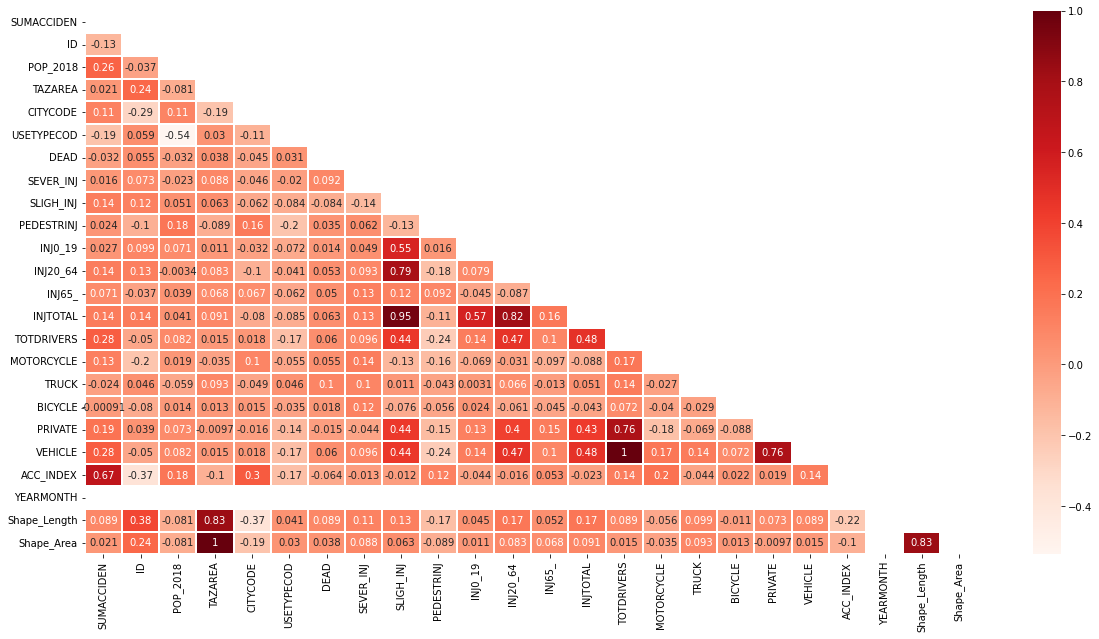

In [8]:
plt.figure(figsize=(20,10))
accidents_heatmap= accidents.corr()
matrix = np.triu(accidents_heatmap)
sns.heatmap(data=accidents_heatmap,cmap='Reds', annot=True, mask=matrix ,linewidths=2)
plt.show()

<right><img src="simpson.webp"
     width="400"  > <right>

### 3.1 Age distribution of the injured:

In [9]:
df = accidents.groupby('INJTOTAL')[['INJ0_19', 'INJ20_64', 'INJ65_']].sum()
df.iloc[1: , :]

,INJ0_19,INJ20_64,INJ65_
INJTOTAL,,,
1.0,259.0,911.0,171.0
2.0,127.0,653.0,83.0
3.0,118.0,411.0,57.0
4.0,107.0,304.0,29.0
5.0,101.0,207.0,21.0
6.0,78.0,125.0,5.0
7.0,45.0,56.0,4.0
8.0,31.0,50.0,7.0
9.0,8.0,10.0,0.0


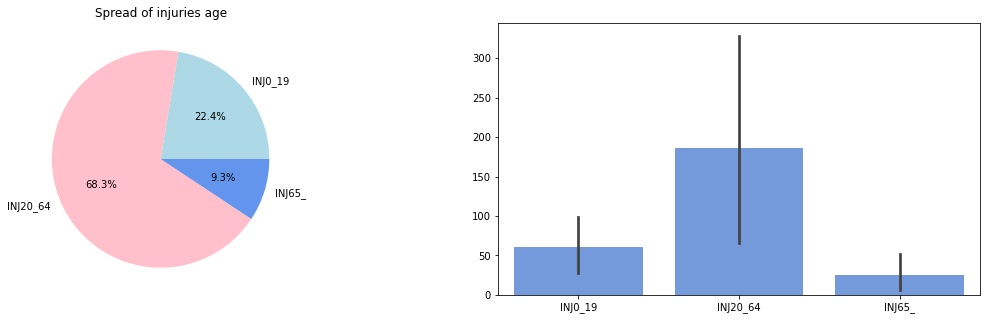

In [10]:
fig, axes = plt.subplots(figsize = (19, 5), ncols = 2)
df.sum().plot.pie(autopct= "%1.1f%%" , title = 'Spread of injuries age' ,ylabel = "", colors=['lightblue', 'pink','cornflowerblue'], ax = axes[0])
sns.barplot(data=df , color="cornflowerblue",ax = axes[1]);

##### To our surprise, we found from the data that most of the injured are in the age range of 20-64. We expected to find that the younger age range would contain most of the injured because of their young age, lack of experience on the road and social influence.
##### From this finding, we recommend increasing the frequency of driving refresher courses and making them more accessible.

### 3.2 Distribution by traffic areas:

In [11]:
places=accidents.groupby('USETYPE').sum()
places

,SUMACCIDEN,ID,POP_2018,TAZAREA,CITYCODE,USETYPECOD,DEAD,SEVER_INJ,SLIGH_INJ,PEDESTRINJ,...,TOTDRIVERS,MOTORCYCLE,TRUCK,BICYCLE,PRIVATE,VEHICLE,ACC_INDEX,YEARMONTH,Shape_Length,Shape_Area
USETYPE,,,,,,,,,,,,,,,,,,,,,
מגורים,37381,2372183,8870100,16359034217,6429087,1832,56.0,310.0,2697.0,484.0,...,3028.0,292.0,55.0,54.0,2142.0,3028.0,62306.607885,370437728,1.730099e+07,1.635903e+10
מוסדי/ציבורי,1473,158878,19744,2773790836,470538,244,8.0,31.0,126.0,21.0,...,166.0,15.0,7.0,3.0,113.0,166.0,2552.910407,24668888,1.343954e+06,2.773791e+09
עתידי/לא ידוע,1123,292625,112,3097849442,149350,1010,10.0,24.0,203.0,5.0,...,208.0,15.0,11.0,2.0,131.0,208.0,744.022100,40845208,2.860113e+06,3.097849e+09
פנאי/טבע/ספורט,2156,332820,8540,3872832507,958473,747,6.0,39.0,241.0,15.0,...,288.0,32.0,12.0,8.0,204.0,288.0,2661.664059,50348796,2.361472e+06,3.872833e+09
תעשיה/מסחר/מתקנים,3927,321422,9823,1601437726,1009672,928,12.0,41.0,334.0,22.0,...,381.0,34.0,12.0,3.0,275.0,381.0,5189.316190,46911328,1.801993e+06,1.601438e+09


In [12]:
accidents['USETYPE']=accidents['USETYPE'].replace(['מגורים','מוסדי/ציבורי' ,'עתידי/לא ידוע','פנאי/טבע/ספורט', 'תעשיה/מסחר/מתקנים'],["םירוגמ" , "ירוביצ\ידסומ" , "עודי אל\ידיתע", "טרופס\עבט\יאנפ", "םינקתמ\רחסמ\הישעת"])

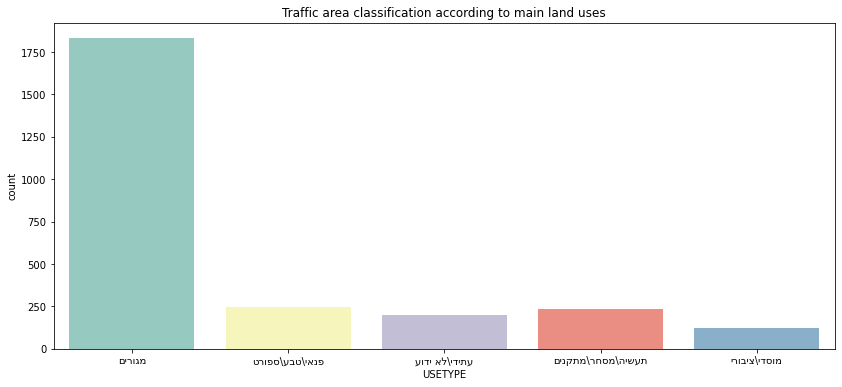

In [13]:
plt.figure(figsize=(14,6)) ;
plt.title("Traffic area classification according to main land uses")
sns.countplot(x= "USETYPE", data=accidents , palette="Set3");

#### According to this graph, it can be seen that most accidents occur in residential areas. This finding probably stems from a feeling of excessive security due to proximity to the house and frivolity.
#### Therefore, we will recommend increasing enforcement in residential areas and urban roads and adding speed cameras.

img<center><img src="accidentgif.gif"
     width="400" > <center>

### 3.3 Accidents in major cities

In [14]:
Grouped_City =accidents.groupby('CITY').sum().reset_index()
Max_Accident= Grouped_City[["CITY","SUMACCIDEN"]].sort_values(by = "SUMACCIDEN", ascending = False).head()
Max_Accident


,CITY,SUMACCIDEN
812,תל אביב -יפו,5992
365,ירושלים,2843
312,חיפה,1806
698,פתח תקווה,1567
302,חולון,1461


In [15]:
Max_Accident['CITY']=Max_Accident['CITY'].replace(['חולון','פתח תקווה','חיפה','ירושלים','תל אביב -יפו'],['ןולוח','הווקת חתפ','הפיח','םילשורי','ופי- ביבא לת'])

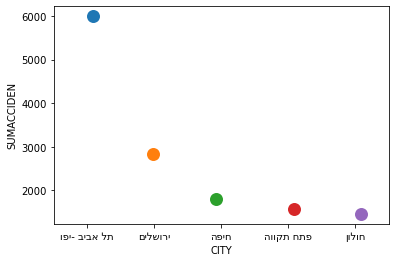

In [16]:
Max_Accident_sns=sns.stripplot(x="CITY", y="SUMACCIDEN", data=Max_Accident , size=13);

In [17]:
Vehicle_Type = accidents.groupby('VEHICLE')[['MOTORCYCLE', 'TRUCK', 'BICYCLE', 'PRIVATE']].sum()
Vehicle_Type

,MOTORCYCLE,TRUCK,BICYCLE,PRIVATE
VEHICLE,,,,
0.0,0.0,0.0,0.0,0.0
1.0,70.0,10.0,6.0,505.0
2.0,289.0,62.0,61.0,1812.0
3.0,19.0,14.0,3.0,319.0
4.0,6.0,9.0,0.0,164.0
5.0,4.0,2.0,0.0,34.0
6.0,0.0,0.0,0.0,18.0
7.0,0.0,0.0,0.0,13.0


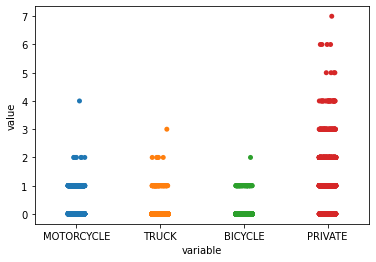

In [18]:
df = pd.DataFrame(data =accidents , columns = ['MOTORCYCLE', 'TRUCK', 'BICYCLE', 'PRIVATE'])
sns.stripplot(x="variable", y="value", data=pd.melt(df))
plt.show()

#### It can be seen that in the central cities of Israel the number of road accidents is the greatest, and in addition, the type of vehicle that is involved in the most accidents is 'private'.
#### From these findings, we recommend encouraging the use of public transportation in cities, and also, increasing enforcement on 'private' vehicles.

<div>
<img src="ayalon.jpg" width="500"/>
</div>

## 4. Summery

### In conclusion, we decided to investigate the data on road accidents in Israel after we discovered that road accidents are one of the five main causes of death in Israel. We tried to understand what are the main causes of accidents and where they happen in order to reduce the number of casualties and deaths. From the analysis of the data we have reached a number of important conclusions that can lead the appropriate factors to create a change in the roads and to create appropriate policies and enforcement in the country.

<div>
<img src="WhatsApp Image 2022-09-04 at 13.02.16 (1).jpeg" width="500"/>
</div>
<div>
<img src="WhatsApp Image 2022-09-04 at 13.02.16 (2).jpeg" width="300"/>
</div>